# Test Clustering Algorithms

This notebook tests a two clustering algorithms for each region using modules from both pyspark, and sci-kitlearn to import the models.

The two clustering algorithms tested are:
1. DBSCAN
2. Hierarchical Clustering

The Notebook is broken down into three sections:

**Section 1:**


Testing the DBSCAN and Hierarchical Clustering across the 4 regions using pandas and scikit-learn.

**Section 2:**

Testing the DBSCAN and Hierarchical Clustering across the 4 regions using pyspark in preparation for the Big Data Analysis.

In [1]:
import sys
from pathlib import Path
import pandas as pd

# get root directory of project
ROOT_DIR = Path.cwd().parent
print(f"ROOT_DIR: {ROOT_DIR}")

sys.path.append(str(ROOT_DIR)) # Add the root directory to sys.path

from src.pandas_clustering import CrashDataProcessor

DATA_DIR = ROOT_DIR / 'data' / 'processed_pandas_data'
PLOTS_DIR = ROOT_DIR / 'data' / 'plots'

ROOT_DIR: /home/jovyan/Final_Project


**Load the Crash Data**

In [2]:
boerne_df = pd.read_csv(DATA_DIR / 'boerne_crash_data.csv')
austin_df = pd.read_csv(DATA_DIR / 'austin_crash_data.csv')
downtown_san_antonio_df = pd.read_csv(DATA_DIR / 'north_san_antonio_crash_data.csv')
sugarland_df = pd.read_csv(DATA_DIR / 'sugarland_crash_data.csv')

View Boerne Crash Data

In [3]:
boerne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crash_ID               3111 non-null   int64  
 1   Crash_Fatal_Fl         3111 non-null   object 
 2   Crash_Date             3111 non-null   object 
 3   Latitude               3111 non-null   float64
 4   Longitude              3111 non-null   float64
 5   Sus_Serious_Injry_Cnt  3111 non-null   int64  
 6   Nonincap_Injry_Cnt     3111 non-null   int64  
 7   Poss_Injry_Cnt         3111 non-null   int64  
 8   Non_Injry_Cnt          3111 non-null   int64  
 9   Unkn_Injry_Cnt         3111 non-null   int64  
 10  Tot_Injry_Cnt          3111 non-null   int64  
 11  Death_Cnt              3111 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 291.8+ KB


View Austin Crash Data

In [4]:
austin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crash_ID               12628 non-null  int64  
 1   Crash_Fatal_Fl         12628 non-null  object 
 2   Crash_Date             12628 non-null  object 
 3   Latitude               12628 non-null  float64
 4   Longitude              12628 non-null  float64
 5   Sus_Serious_Injry_Cnt  12628 non-null  int64  
 6   Nonincap_Injry_Cnt     12628 non-null  int64  
 7   Poss_Injry_Cnt         12628 non-null  int64  
 8   Non_Injry_Cnt          12628 non-null  int64  
 9   Unkn_Injry_Cnt         12628 non-null  int64  
 10  Tot_Injry_Cnt          12628 non-null  int64  
 11  Death_Cnt              12628 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.2+ MB


View Downtown San Antonio Crash Data

In [5]:
downtown_san_antonio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12836 entries, 0 to 12835
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crash_ID               12836 non-null  int64  
 1   Crash_Fatal_Fl         12836 non-null  object 
 2   Crash_Date             12836 non-null  object 
 3   Latitude               12836 non-null  float64
 4   Longitude              12836 non-null  float64
 5   Sus_Serious_Injry_Cnt  12836 non-null  int64  
 6   Nonincap_Injry_Cnt     12836 non-null  int64  
 7   Poss_Injry_Cnt         12836 non-null  int64  
 8   Non_Injry_Cnt          12836 non-null  int64  
 9   Unkn_Injry_Cnt         12836 non-null  int64  
 10  Tot_Injry_Cnt          12836 non-null  int64  
 11  Death_Cnt              12836 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.2+ MB


View Sugarland Crash Data

In [6]:
sugarland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20046 entries, 0 to 20045
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crash_ID               20046 non-null  int64  
 1   Crash_Fatal_Fl         20046 non-null  object 
 2   Crash_Date             20046 non-null  object 
 3   Latitude               20046 non-null  float64
 4   Longitude              20046 non-null  float64
 5   Sus_Serious_Injry_Cnt  20046 non-null  int64  
 6   Nonincap_Injry_Cnt     20046 non-null  int64  
 7   Poss_Injry_Cnt         20046 non-null  int64  
 8   Non_Injry_Cnt          20046 non-null  int64  
 9   Unkn_Injry_Cnt         20046 non-null  int64  
 10  Tot_Injry_Cnt          20046 non-null  int64  
 11  Death_Cnt              20046 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.8+ MB


## Section 1

Test the DBSCAN and Hierarchical Clustering across the 4 regions using pandas and scikit-learn.

**DBSCAN Clustering for Boerne, TX**

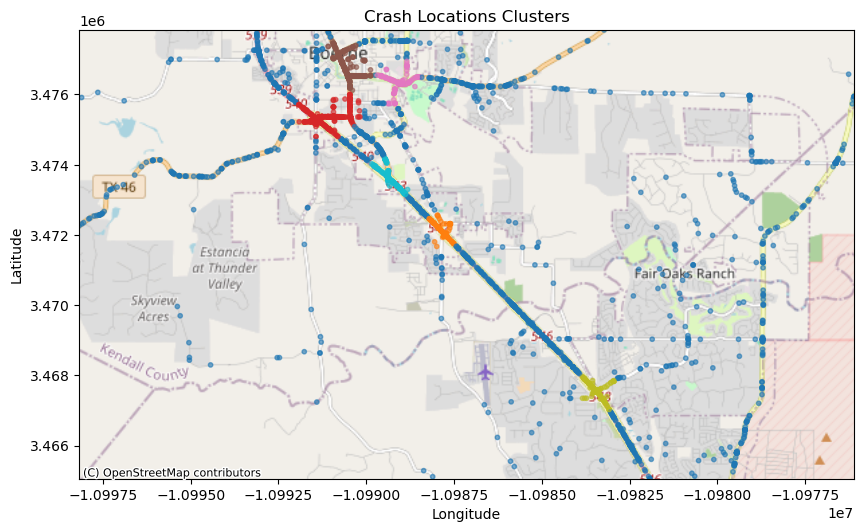

In [7]:
plots_path = PLOTS_DIR / 'DBSCAN_boerne.png'

boerne_crashes = CrashDataProcessor(boerne_df)

# model DBSCAN
boerne_clustered = boerne_crashes.DBSCAN_model(eps=.003, min_samples=100) # use default eps and min_samples
boerne_clustered.plot_clusters(cluster_column='DBSCAN_cluster', save_path=plots_path)

**DBSCAN Clustering for Downtown San Antonio, TX**

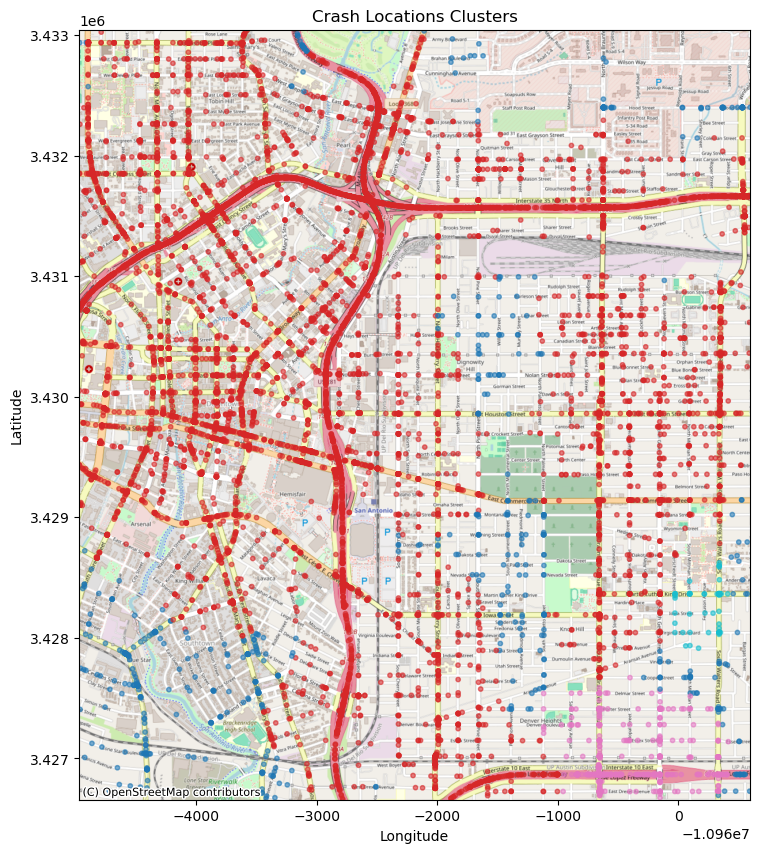

In [8]:
plots_path = PLOTS_DIR / 'DBSCAN_downtown_san_antonio.png'

downtown_sa_crashes = CrashDataProcessor(downtown_san_antonio_df)

# model DBSCAN
downtown_sa_clustered = downtown_sa_crashes.DBSCAN_model(eps=.003, min_samples=100) # use default eps and min_samples
downtown_sa_clustered.plot_clusters(cluster_column='DBSCAN_cluster', zoom=15, save_path=plots_path)

**DBSCAN Clustering for Sugarland, TX**

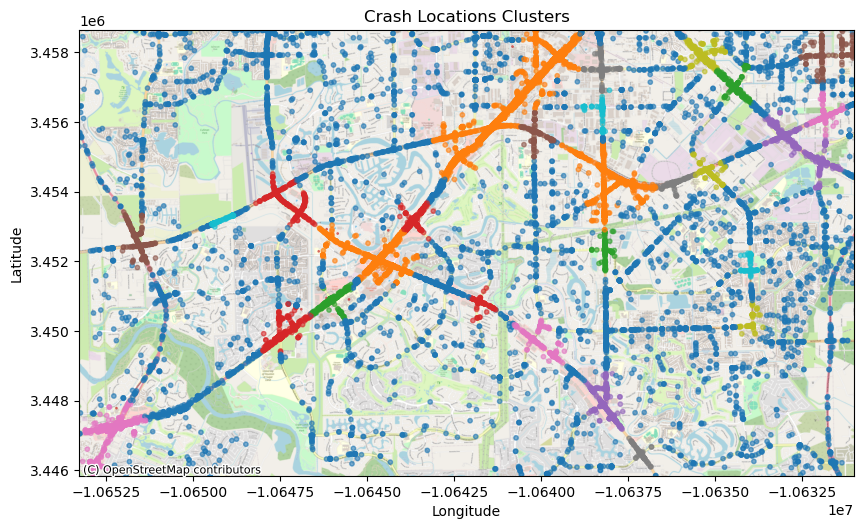

In [9]:
plots_path = PLOTS_DIR / 'DBSCAN_sugarland.png'

sugarland_crashes = CrashDataProcessor(sugarland_df)

# model DBSCAN
sugarland_clustered = sugarland_crashes.DBSCAN_model(eps=.003, min_samples=100) # use default eps and min_samples
sugarland_clustered.plot_clusters(cluster_column='DBSCAN_cluster', zoom=15, save_path=plots_path)

**DBSCAN Clustering for Austin, TX**

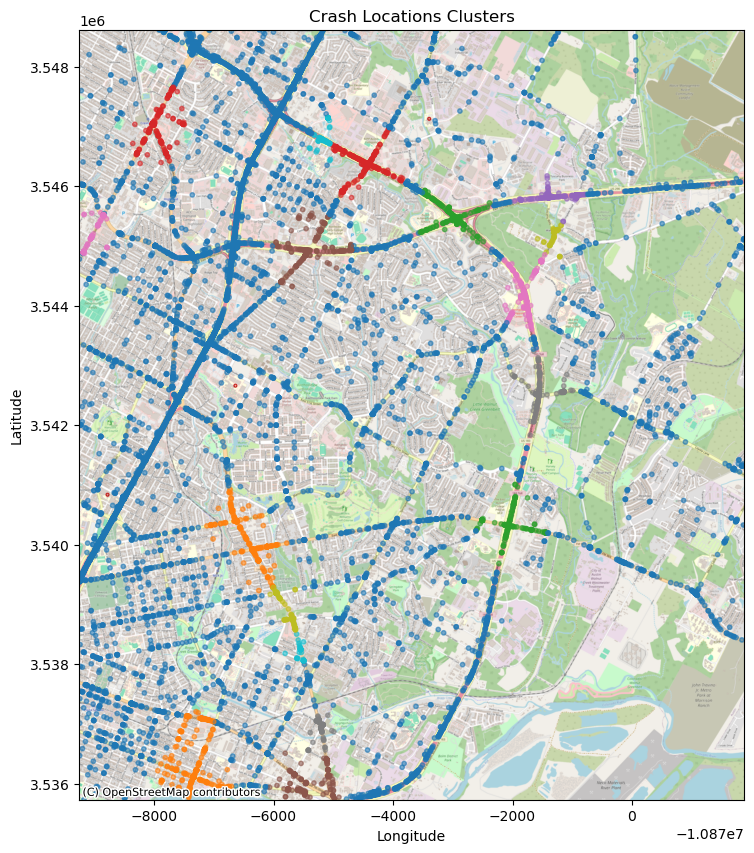

In [10]:
austin_crashes = CrashDataProcessor(austin_df)

# model DBSCAN
austin_clustered = austin_crashes.DBSCAN_model(eps=.003, min_samples=100) # use default eps and min_samples
austin_clustered.plot_clusters(cluster_column='DBSCAN_cluster', zoom=15)

## Perform Hierarchical Clustering

**Hierarchical Clustering for Boerne, TX**

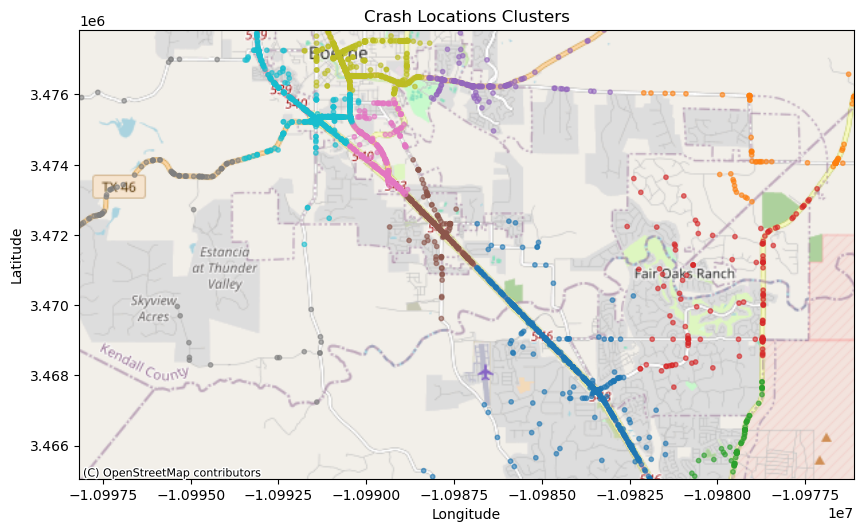

In [11]:
boerne_hier = boerne_crashes.hier_model()
boerne_hier.plot_clusters(cluster_column='hier_cluster')

**Hierarchical Clustering for Downtown San Antonio, TX**

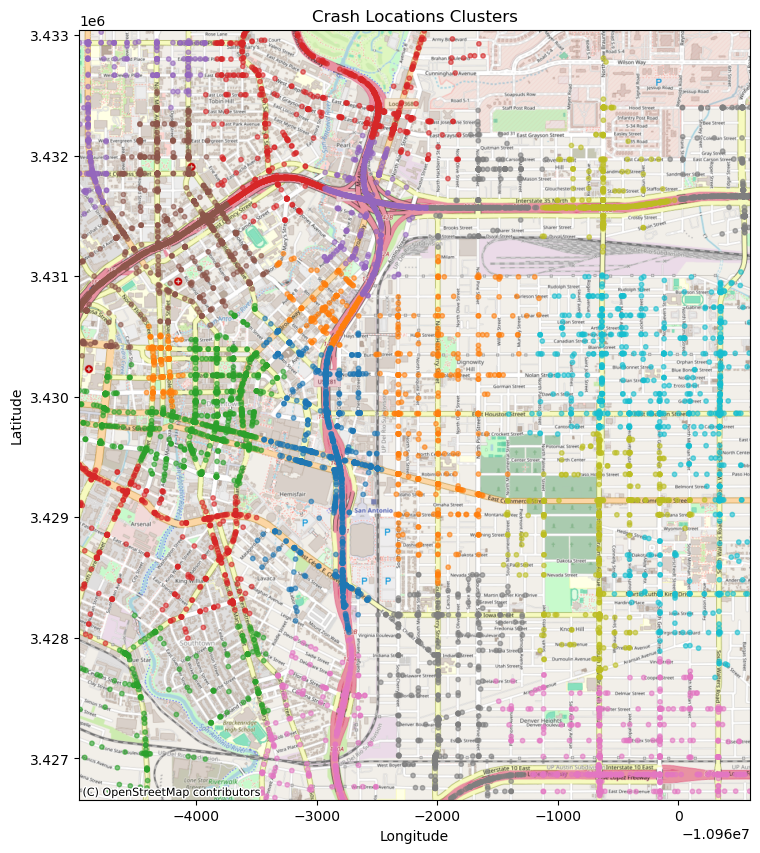

In [12]:
downtown_sa_hier = downtown_sa_crashes.hier_model()
downtown_sa_hier.plot_clusters(cluster_column='hier_cluster', zoom=15)

**Hierarchical Clustering for Sugarland, TX**

In [ ]:
sugarland_hier = sugarland_crashes.hier_model()
sugarland_hier.plot_clusters(cluster_column='hier_cluster', zoom=15)

**Hierarchical Clustering for Austin, TX**

In [ ]:
austin_hier = austin_crashes.hier_model()
austin_hier.plot_clusters(cluster_column='hier_cluster', zoom=15)